In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import label

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
base = automap_base()
# Reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

The last date in the dataset is: 2017-08-23
The date 1 year from the last data point is 2016-08-23


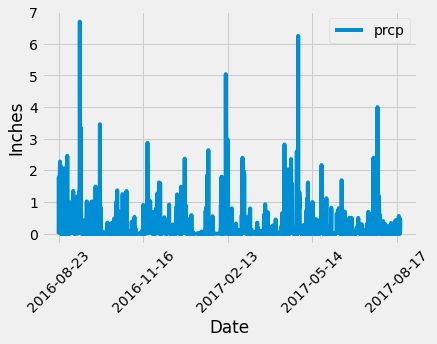

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Get last date in the dataset
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The last date in the dataset is: {last_date[0]}")

# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("The date 1 year from the last data point is", year_ago)

# Perform a query to retrieve the data and precipitation scores
precipt_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
                 filter(measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipt_scores_df = pd.DataFrame(precipt_scores).set_index('date')

# Sort the dataframe by date & remove any n/a values
precipt_scores_df = precipt_scores_df.sort_values(by='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipt_scores_df.plot(rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipt_scores_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Show how many stations are available in this dataset
station_count = session.query(station.id).count() 
print(f'There are {station_count} stations in the dateset.')

There are 9 stations in the dateset.


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. The top station in the list is the most active.

most_active_station =  session.query(measurement.station, func.count(measurement.station)).\
                       group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, 'USC00519281', calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temps')

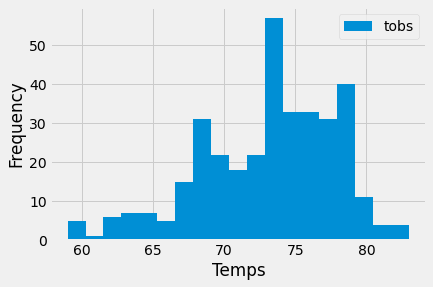

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(measurement.date, measurement.tobs).\
           filter(measurement.date >= "2016-08-23").\
           filter(measurement.date <= "2017-08-23").\
           filter(measurement.station == 'USC00519281').all()
# temp_obs
temp_obs_df = pd.DataFrame(temp_obs)
temp_obs_df.plot.hist(bins=19)
plt.xlabel("Temps")